<a href="https://colab.research.google.com/github/Anshikadude/Random-Forest-Classifier/blob/main/credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix , accuracy_score, precision_score


from pylab import rcParams
rcParams['figure.figsize'] = 8,8

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [ ]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,-0.390521,...,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0
1,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,-0.616315,...,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00,0
2,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,1.560463,...,-0.193271,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70,0
3,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,-0.001965,...,0.157994,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99,0
4,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,-1.131238,...,0.224157,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56957,2.030797,-0.825073,-0.729555,-0.519187,-0.639893,-0.169482,-0.619049,-0.017902,-0.578643,0.915645,...,-0.790167,-1.825357,0.600083,0.702623,-0.782688,-0.007105,-0.041057,-0.038601,42.42,0
56958,-0.263947,1.119700,-0.639394,-0.880567,1.194120,-0.310693,0.962087,-0.088880,0.386664,0.195362,...,-0.448081,-0.893010,0.004678,0.062555,-0.347536,0.106510,0.274117,-0.036263,7.99,0
56959,2.206867,-0.748559,-1.443015,-1.101542,-0.332197,-0.646931,-0.536272,-0.129437,-0.712381,1.057616,...,0.471336,1.314052,0.038930,0.747315,0.158017,0.021897,-0.046200,-0.072586,1.00,0
56960,1.430579,-0.842354,0.415998,-1.328439,-1.284654,-0.888110,-0.653237,-0.238164,-2.220845,1.350845,...,-0.577415,-1.323989,0.336843,0.329714,-0.007425,-0.636401,0.037095,0.029180,30.00,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56962 entries, 0 to 56961
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      56962 non-null  float64
 1   V2      56962 non-null  float64
 2   V3      56962 non-null  float64
 3   V4      56962 non-null  float64
 4   V5      56962 non-null  float64
 5   V6      56962 non-null  float64
 6   V7      56962 non-null  float64
 7   V8      56962 non-null  float64
 8   V9      56962 non-null  float64
 9   V10     56962 non-null  float64
 10  V11     56962 non-null  float64
 11  V12     56962 non-null  float64
 12  V13     56962 non-null  float64
 13  V14     56962 non-null  float64
 14  V15     56962 non-null  float64
 15  V16     56962 non-null  float64
 16  V17     56962 non-null  float64
 17  V18     56962 non-null  float64
 18  V19     56962 non-null  float64
 19  V20     56962 non-null  float64
 20  V21     56962 non-null  float64
 21  V22     56962 non-null  float64
 22

In [ ]:
df['Target'].value_counts()

0    56864
1       98
Name: Target, dtype: int64

In [ ]:
x = df.drop(['Target'], axis = 1)
x.head

<bound method NDFrame.head of              V1        V2        V3        V4        V5        V6        V7  \
0      0.114697  0.796303 -0.149553 -0.823011  0.878763 -0.553152  0.939259   
1     -0.039318  0.495784 -0.810884  0.546693  1.986257  4.386342 -1.344891   
2      2.275706 -1.531508 -1.021969 -1.602152 -1.220329 -0.462376 -1.196485   
3      1.940137 -0.357671 -1.210551  0.382523  0.050823 -0.171322 -0.109124   
4      1.081395 -0.502615  1.075887 -0.543359 -1.472946 -1.065484 -0.443231   
...         ...       ...       ...       ...       ...       ...       ...   
56957  2.030797 -0.825073 -0.729555 -0.519187 -0.639893 -0.169482 -0.619049   
56958 -0.263947  1.119700 -0.639394 -0.880567  1.194120 -0.310693  0.962087   
56959  2.206867 -0.748559 -1.443015 -1.101542 -0.332197 -0.646931 -0.536272   
56960  1.430579 -0.842354  0.415998 -1.328439 -1.284654 -0.888110 -0.653237   
56961 -7.792712  5.599937  0.258943  0.061360 -2.586555  4.770837 -8.221863   

              V8     

In [ ]:
y = df['Target']

In [ ]:
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0, stratify = y)

In [ ]:
y_train.value_counts()

0    45491
1       78
Name: Target, dtype: int64

In [ ]:
78/(78+45491)*100

0.17116899646689637

In [ ]:
y_test.value_counts()

0    11373
1       20
Name: Target, dtype: int64

In [ ]:
20/(20+11373)*100

0.17554638813306417

In [ ]:
clf = RandomForestClassifier(n_estimators=50, max_depth =3)
#grid_values = {'n_estimators':[50,80,100], 'max_depth':[3,5,7]}
#clf = GridSearchCV(clf, param_grid= grid_values, scoring = 'roc_auc', cv =5)
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=50)

In [ ]:
train_pred = clf.predict(x_train)
test_pred = clf.predict(x_test)

In [ ]:
precision_score(y_train,train_pred)

0.9375

In [ ]:
confusion_matrix(y_train,train_pred)

array([[45488,     3],
       [   33,    45]])

In [ ]:
confusion_matrix(y_test,test_pred)

array([[11371,     2],
       [    6,    14]])

In [ ]:
features = x_train.columns
from sklearn.inspection import permutation_importance
importances= clf.feature_importances_
indices = np.argsort(importances)

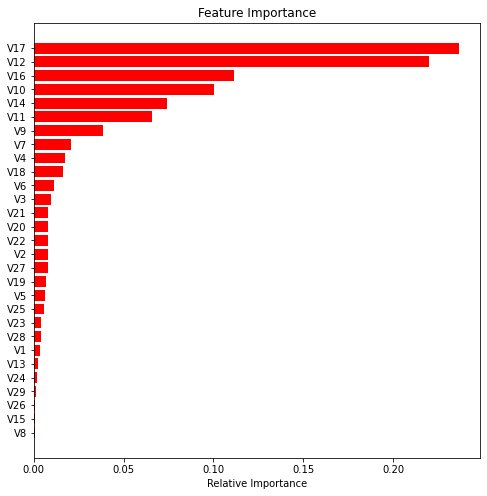

In [ ]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color = 'red', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()